### labolatorio 2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#https://github.com/juanjos12molina/IA

### Se importan las librerias que se haran uso

In [2]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
import pandas as pd
from sklearn import preprocessing
import csv
%matplotlib inline

## Se utiliza la librerria pandas para el cargado de datos y posterior preprocesamiento

In [3]:
#cargado de datos
df = pd.read_csv("/content/drive/MyDrive/IA/dataset/bank-full.csv", sep=";")
#uso de diccionarios para cambiar los datos
diccionario = {"no": 0, "yes": 1}
df["y"] = df["y"].replace(diccionario)
diccionario = {"no": 1, "yes": 2}
df["housing"] = df["housing"].replace(diccionario)
diccionario2 = {"married": 1, "single": 2, "divorced":3}
df["marital"] = df["marital"].replace(diccionario2)
diccionario3 = {"unknown": 1, "cellular": 2, "telephone":3}
df["contact"] = df["contact"].replace(diccionario3)
diccionario4 = {"ene": 13, "feb": 1, "mar":2, "apr":3, "may":4, "jan":5, "jul":6, "aug":7, "sep":8, "oct":9, "nov":10, "dec":11,"jun":12}
df["month"] = df["month"].replace(diccionario4)
diccionario5 = {"unknown": 12, "blue-collar": 1, "management":2, "technician":3, "admin.":4, "services":5, "retired":6, "self-employed":7, "entrepreneur":8, "unemployed":9, "housemaid":10, "student":11}
df["job"] = df["job"].replace(diccionario5)
diccionario5 = {"unknown": 4, "tertiary": 1, "primary":2, "secondary":3}
df["education"] = df["education"].replace(diccionario5)
diccionario5 = {"unknown": 4, "failure": 1, "other":2, "success":3}
df["poutcome"] = df["poutcome"].replace(diccionario5)
#se eliminan los datos que entran en conflicto con las operaciones
df = df.drop('default', axis=1)
df = df.drop('loan', axis=1)
df.drop_duplicates()
df.dropna(axis=0, thresh=2) #Elimina filas con n o más valores nulos.

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,2,1,1,2143,2,1,5,4,261,1,-1,0,4,0
1,44,3,2,3,29,2,1,5,4,151,1,-1,0,4,0
2,33,8,1,3,2,2,1,5,4,76,1,-1,0,4,0
3,47,1,1,4,1506,2,1,5,4,92,1,-1,0,4,0
4,33,12,2,4,1,1,1,5,4,198,1,-1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,1,1,825,1,2,17,10,977,3,-1,0,4,1
45207,71,6,3,2,1729,1,2,17,10,456,2,-1,0,4,1
45208,72,6,1,3,5715,1,2,17,10,1127,5,184,3,3,1
45209,57,1,1,3,668,1,3,17,10,508,4,-1,0,4,0


## Informacion del dataset luego de los cambios realiazados

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   balance    45211 non-null  int64
 5   housing    45211 non-null  int64
 6   contact    45211 non-null  int64
 7   day        45211 non-null  int64
 8   month      45211 non-null  int64
 9   duration   45211 non-null  int64
 10  campaign   45211 non-null  int64
 11  pdays      45211 non-null  int64
 12  previous   45211 non-null  int64
 13  poutcome   45211 non-null  int64
 14  y          45211 non-null  int64
dtypes: int64(15)
memory usage: 5.2 MB
None


## Se asina el 80% de los datos para entrenar el modelo y el 20% para testear

In [4]:
X = df.iloc[:36169, :-1]
X_test = df.iloc[36169:, :-1]
y = df.iloc[:36169, df.columns.get_loc("y")]
y_test = df.iloc[36169:, df.columns.get_loc("y")]

## Se crea la funcio sigmoid

In [5]:
def sigmoid(z):
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))

    return g

In [ ]:
#peuba de la funcion
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [6]:
def decision(probabilidad):
  punto_corte = 0.5
  return np.where(probabilidad >= punto_corte, 1, 0)

In [7]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [8]:
X_norm, mu, sigma = featureNormalize(X)

# se agrega los 1

In [9]:
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [10]:
def calcularCosto(theta, X, y):
    m = y.size
    lambda_ = 0.1
    J = 0
    h = sigmoid(X.dot(theta.T))
    temp = theta
    temp[0] = 0
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))  + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J

In [11]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

# Entrenamiento

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
theta calculado por el descenso por el gradiente: [ 0.          0.00147965  0.01243533  0.03259153 -0.03387913  0.0227925
 -0.06357591  0.06359376  0.00960952 -0.05628975  0.60401366  0.01217316
 -0.01131569  0.0018282   0.00257247]


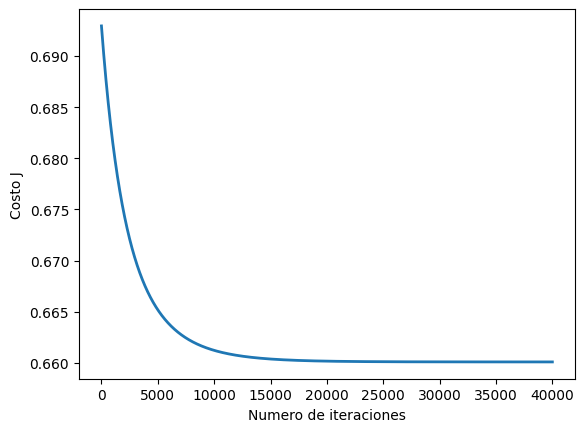

In [12]:
alpha = 0.001
num_iters = 40000

num_features = X.shape[1]
theta = np.zeros(15)
print(theta)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)


pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Se aplica en X_tes la facturalizacion y se agregan las columna de unos

In [13]:
X_test, mu, sigma = featureNormalize(X_test)
m, n = X_test.shape
X_test = np.concatenate([np.ones((m, 1)), X_test], axis=1)
aprueba = sigmoid(np.dot(X_test, theta))


# Test con el 20% de datos

In [14]:
probabilidad = sigmoid(np.dot(X_test, theta))
resultado = decision(probabilidad)
print(resultado)

[0 0 1 ... 1 1 1]


In [15]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

In [16]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[ 4.32732450e-01  3.66702823e-03 -4.53067277e-03 -1.10467743e-02
  9.37781263e-03 -7.11944194e-03  1.39932145e-02 -1.86065755e-02
  5.63104747e-05  1.61775137e-02 -1.15565577e-01  8.24986592e-03
  1.48313396e-03 -6.50982324e-05 -1.90783953e-03]
Gradiente en theta inicial (zeros):
	[0.4327, 0.0037, -0.0045]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



In [17]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array(X[1])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n')

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[0.043, 2.566, 2.647]')

[ 1.          0.32734221 -0.23025329  0.71729697  0.73830392 -0.43323871
  0.85677236 -1.24206996 -1.31055339 -0.68661377 -0.40144511 -0.57728007
 -0.31466723 -0.15823231  0.33461018]
Costo en theta prueba: 1.918
Costo esperado (aproximado): 0.218

Gradiente en theta prueba:
	[0.548, -0.007, -0.039]
Gradiente esperado (aproximado):
	[0.043, 2.566, 2.647]


In [18]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[-25.161, 0.206, 0.201]')

Costo con un valor de theta encontrado por optimize.minimize: 0.173
Costo esperado (aproximado): 0.203

theta:
	[-3.398, -0.039, 0.037]
Theta esperado (aproximado):
	[-25.161, 0.206, 0.201]


<ipython-input-18-0dfcfa2e2ef1>:7: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,
<ipython-input-15-e3041c0335d8>:10: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


In [19]:
def predict(theta, X):
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [20]:
#  Predice la probabilidad de ingreso para un estudiante con nota de 45 en el examen 1 y nota de 85 en el examen 2
prob = sigmoid(np.dot([1, 45, 85,23,23,23,23,23,23,23,23,23,23,23,23], theta))
print('Para un estudiante con notas de 45 y 85, se predice una probabilidad de admisión de: {:.3f}%'.format(prob))
print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))
print('Precisión esperada (aproximadamente): 89.00 %')

Para un estudiante con notas de 45 y 85, se predice una probabilidad de admisión de: 1.000%
Valor esperado: 0.775 +/- 0.002

Precisión de entrenamiento: 93.76 %
Precisión esperada (aproximadamente): 89.00 %
